In [1]:
import pandas as pd
df = pd.read_csv(r'Data\questions_nlp_task.csv')
df.head(10)

,Main Question
0,Are there information security requirements fo...
1,What is the password history before reuse?
2,What controls are in place for accessing produ...
3,Is this system developed and tested using secu...
4,What kind of AI is in use?\r\n- Deep Learning\...
5,Does the organization maintain criteria and co...
6,Does your organization ensure that no live dat...
7,Does the product include recommendations on th...
8,Has this client application/system been a part...
9,Are you a provider of health benefit services?


In [3]:
df.shape

(212, 1)

In [4]:
questions=df.iloc[:,0].dropna().tolist()
print(questions)

['Are there information security requirements for Protecting Application Services Transactions?', 'What is the password history before reuse?', 'What controls are in place for accessing production systems?', 'Is this system developed and tested using secure coding standards and practices?', 'What kind of AI is in use?\r\n- Deep Learning\r\n- Generative AI\r\n- Machine Learning', 'Does the organization maintain criteria and conditions that trigger conducting a PIA?', 'Does your organization ensure that no live data, especially personal data, is used in test/development environments?', 'Does the product include recommendations on the hardening or best practice configuration, including the default state of the product?', 'Has this client application/system been a part of a PCI DSS audit in the last 12 months?', 'Are you a provider of health benefit services?', 'Does your company have an individual or group responsible for security within the organization?', 'Do you comply with any request

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
import nltk
from collections import Counter
import re
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aagab\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [6]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words] 
    return " ".join(words)

In [7]:
df["cleaned_questions"] = df["Main Question"].apply(clean_text)

In [8]:
df.head()

,Main Question,cleaned_questions
0,Are there information security requirements fo...,information security requirements protecting a...
1,What is the password history before reuse?,password history reuse
2,What controls are in place for accessing produ...,controls place accessing production systems
3,Is this system developed and tested using secu...,system developed tested using secure coding st...
4,What kind of AI is in use?\r\n- Deep Learning\...,kind ai use deep learning generative ai machin...


In [46]:
questions=df.iloc[:,0].dropna().tolist()
print(questions)


['Are there information security requirements for Protecting Application Services Transactions?', 'What is the password history before reuse?', 'What controls are in place for accessing production systems?', 'Is this system developed and tested using secure coding standards and practices?', 'What kind of AI is in use?\n- Deep Learning\n- Generative AI\n- Machine Learning', 'Does the organization maintain criteria and conditions that trigger conducting a PIA?', 'Does your organization ensure that no live data, especially personal data, is used in test/development environments?', 'Does the product include recommendations on the hardening or best practice configuration, including the default state of the product?', 'Has this client application/system been a part of a PCI DSS audit in the last 12 months?', 'Are you a provider of health benefit services?', 'Does your company have an individual or group responsible for security within the organization?', 'Do you comply with any request from 

In [ ]:
from itertools import combinations
def similar_question(questions,threshold=0.2):
    vectorizer = TfidfVectorizer(stop_words="english")
    tfidf_matrix = vectorizer.fit_transform(questions)
    similarity_matrix = cosine_similarity(tfidf_matrix)
    pairs = []
    n = len(questions)

    #combination gives pair without reapeating, taking two questions without repeating them
    for i, j in combinations(range(n), 2):
      pairs.append({
          'Question 1': questions[i],
          'Question 2': questions[j],
          'Similarity': similarity_matrix[i][j]
      })

    sorted_pairs = sorted(pairs, key=lambda x: x['Similarity'], reverse=True)
    top_n = 10
    top_groups = sorted_pairs[:top_n]

    print(top_groups[0])

    print(f"Top {top_n} Most Similar Question Pairs:")
    for idx, group in enumerate(top_groups, 1):
        print(f"\nGroup {idx} (Similarity: {group['Similarity']:.4f}):")
        print(f"Q1: {group['Question 1']}")
        print(f"Q2: {group['Question 2']}")
        print("─" * 80)




similar_question(questions=questions,threshold=0.2)

{'Question 1': 'Please select all password authentication best practices that have been implemented:\n- Minimum password length is 8 characters with full complexity\n- Password rotation once in 90 days or less\n- Account lockout or suspension after 6 failed attempts\n- Password history of 6 previously used passwords stored and restricted from reuse\n- Passwords stored hashed and salted in accordance with industry best practices\n- Password-protected screensaver set to no more than 15 minutes expiry after idle time\n- Denies access whenever an authentication or authorization fails in the application\n- Users validated on every request\n- Other', 'Question 2': 'Can the system be configured to meet the following password requirements (local authentication):\n-must contain a minimum of eight characters;\n-must include at least one character from three of the following four sets: (1) uppercase alpha, (2) lowercase alpha, (3) numeric, and (4) special characters (e.g. #$%@!);\n-must expire or

In [59]:
#categorize question into different topics using the k mean clusturing
from sklearn.cluster import KMeans
def similar_group(questions,num_clusters=3):
    vectorizer = TfidfVectorizer(stop_words="english")
    tfidf_matrix = vectorizer.fit_transform(questions)

    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    clusters = kmeans.fit_predict(tfidf_matrix)

    return clusters


num_clusters = 3
df["category"] = similar_group(df["cleaned_questions"],num_clusters=num_clusters)
for i in range(num_clusters):
  print(f"Cluster {i+1}:")
  print(df[df["category"] == i]["Main Question"].tolist())
  print()


Cluster 1:
['What is the password history before reuse?', 'Is this system developed and tested using secure coding standards and practices?', 'What kind of AI is in use?\n- Deep Learning\n- Generative AI\n- Machine Learning', 'Does the organization maintain criteria and conditions that trigger conducting a PIA?', 'Does the product include recommendations on the hardening or best practice configuration, including the default state of the product?', 'Are you a provider of health benefit services?', 'For which of these does your company establish and maintain baseline configurations and inventories?', 'What User Interfaces are supported out-of-box? What UIs typically need to be built?', 'Do you have a process to maintain oversight on your third parties, subcontractors, labor hire and recruitment agencies, franchisees, etc., adhering to all relevant labor laws? Please share details of the process.', 'Is Ad-Hoc or batched report generation supported?', 'Is there any acceptable usage guidanc

In [52]:
df.head()

,Main Question,cleaned_questions,category
0,Are there information security requirements fo...,information security requirements protecting a...,2
1,What is the password history before reuse?,password history reuse,0
2,What controls are in place for accessing produ...,controls place accessing production systems,2
3,Is this system developed and tested using secu...,system developed tested using secure coding st...,0
4,What kind of AI is in use?\n- Deep Learning\n-...,kind ai use deep learning generative ai machin...,0


In [60]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words] 
    return " ".join(words)

In [ ]:
def search_questions(query, top_n=5):

    vectorizer = TfidfVectorizer(stop_words="english") #instance created for both query and the questions


    tfidf_matrix = vectorizer.fit_transform(questions)


    query_cleaned = clean_text(query)  # Clean the user query
    query_vector = vectorizer.transform([query_cleaned])  # Convert query to vector

    similarities = cosine_similarity(query_vector, tfidf_matrix).flatten()  # Compute cosine similarity and flatten it to convert it to 1-D array

    # Get top N similar questions
    similar_indices = similarities.argsort()[-top_n:][::-1] #finding the index of the top_n similar question

    return df.iloc[similar_indices]["Main Question"].tolist() #using iloc to return its actual text

# Example Usage
query = "Authentication"
similar_questions = search_questions(query, top_n=5)
print(similar_questions)

['Are there any REST API authentication methods?', 'Can a single instance support authentication from multiple Active Directory domains?', 'What are the authentication factors used to access web applications that capture, display, or interface with confidential information?', 'Describe your network defenses (Examples: firewalls, Anti-Malware (AV, whitelisting), IPS, IDS, DDOS Protection, Two-factor authentication, etc.).', 'Please select all password authentication best practices that have been implemented:\n- Minimum password length is 8 characters with full complexity\n- Password rotation once in 90 days or less\n- Account lockout or suspension after 6 failed attempts\n- Password history of 6 previously used passwords stored and restricted from reuse\n- Passwords stored hashed and salted in accordance with industry best practices\n- Password-protected screensaver set to no more than 15 minutes expiry after idle time\n- Denies access whenever an authentication or authorization fails i

In [65]:
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

stop_words = set(stopwords.words('english'))

# Function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W+', ' ', text)  # Remove special characters
    words = text.split()
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return " ".join(words)

# Load dataset
file_path = r"Data\questions_nlp_task.csv"
df = pd.read_csv(file_path)

# Clean questions
df["cleaned_questions"] = df["Main Question"].astype(str).apply(clean_text)

# Extract first word to analyze question structure
df["first_word"] = df["Main Question"].astype(str).str.split().str[0].str.lower()

# Count question types
question_type_counts = Counter(df["first_word"])

# Identify common keywords using TF-IDF
vectorizer = TfidfVectorizer(stop_words="english", max_features=20)
tfidf_matrix = vectorizer.fit_transform(df["cleaned_questions"])
keywords = vectorizer.get_feature_names_out()

# Clustering questions into topics using KMeans
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df["category"] = kmeans.fit_predict(tfidf_matrix)

# Display topic clusters
topics = {}
for i in range(num_clusters):
    topics[f"Category {i+1}"] = df[df["category"] == i]["Main Question"].head(5).tolist()

# Generate summary
summary = f"""
🔹 **Most Common Topics Identified**:
1️⃣ **Category 1:** {topics['Category 1']}
2️⃣ **Category 2:** {topics['Category 2']}
3️⃣ **Category 3:** {topics['Category 3']}

🔹 **Patterns in Question Structure**:
- "How" questions: {question_type_counts['how']} occurrences
- "What" questions: {question_type_counts['what']} occurrences
- "Why" questions: {question_type_counts['why']} occurrences
-  'Do' questions: {question_type_counts['do']} occurrences
- "Can/Do" questions: {question_type_counts['can'] + question_type_counts['do']} occurrences

🔹 **Common Keywords Across Questions**:
{', '.join(keywords)}
"""

print(summary)



🔹 **Most Common Topics Identified**:
1️⃣ **Category 1:** ['Provide Security architecture landscape/diagram for both models: (includes but is not limited to endpoint,\ninternet/network, server, and DR)\n1. On-premise model\n2. Cloud model', 'Regarding your General Liability insurance, please provide the following: 1) name of your carrier; 2) coverage level (both per occurrence and aggregate); and 3) confirmation that the policy is paid in full and currently in force.', 'Do you provide an automated defect-tracking process for System changes and Enhancements?', "If you have a business continuity plan, on which frequency it's exercised and can you provide us with a summary of the results of the latest test?", 'Does the vendor provide services that may create an environmental exposure (storage of or handling of oil, gas, other toxic waste, etc.)?']
2️⃣ **Category 2:** ['Are there information security requirements for Protecting Application Services Transactions?', 'What is the password his

In [67]:
df.head()

,Main Question,cleaned_questions,first_word,category
0,Are there information security requirements fo...,information security requirements protecting a...,are,1
1,What is the password history before reuse?,password history reuse,what,1
2,What controls are in place for accessing produ...,controls place accessing production systems,what,1
3,Is this system developed and tested using secu...,system developed tested using secure coding st...,is,1
4,What kind of AI is in use?\n- Deep Learning\n-...,kind ai use deep learning generative ai machin...,what,1


In [ ]:
def summarize_questions(df):
    num_clusters=3
    # 1. Most common topics/themes
    print("\n=== Most Common Topics/Themes ===")
    for i in range(num_clusters):
        print(f"\nCategory {i+1}:")
        cluster_questions = df[df["category"] == i]["Main Question"].tolist()
        print(f"Number of questions: {len(cluster_questions)}")
        print("Sample questions:")
        for question in cluster_questions[:5]:  
            print(f"- {question}")

    # 2. Patterns in question structure
    print("\n=== Patterns in Question Structure ===")
    question_start_words = [question.split()[0] for question in df["Main Question"].tolist()]
    start_word_counts = Counter(question_start_words)
    print("\nMost common question starters:")
    for word, count in start_word_counts.most_common(5):
        print(f"- '{word}' appears {count} times")

    # 3. Common keywords or phrases
    print("\n=== Common Keywords or Phrases ===")

    #Cleaned question with the removal of all the stop word and puncuation so that, only the true meaning of the sentence remains
    all_words = " ".join(df["cleaned_questions"]).split()
    word_counts = Counter(all_words)
    print("\nMost common keywords:")
    for word, count in word_counts.most_common(10):  # Top 10 keywords
        print(f"- '{word}' appears {count} times")

# Generate the summary
summarize_questions(df)


=== Most Common Topics/Themes ===

Category 1:
Number of questions: 22
Sample questions:
- Provide Security architecture landscape/diagram for both models: (includes but is not limited to endpoint,
internet/network, server, and DR)
1. On-premise model
2. Cloud model
- Regarding your General Liability insurance, please provide the following: 1) name of your carrier; 2) coverage level (both per occurrence and aggregate); and 3) confirmation that the policy is paid in full and currently in force.
- Do you provide an automated defect-tracking process for System changes and Enhancements?
- If you have a business continuity plan, on which frequency it's exercised and can you provide us with a summary of the results of the latest test?
- Does the vendor provide services that may create an environmental exposure (storage of or handling of oil, gas, other toxic waste, etc.)?

Category 2:
Number of questions: 148
Sample questions:
- Are there information security requirements for Protecting App

In [84]:
print("\n=== Patterns in Question Structure ===")
question_start_words = [question.split()[0] for question in df["Main Question"].tolist()]
start_word_counts = Counter(question_start_words)
print("\nMost common question starters:")
for word, count in start_word_counts.most_common(5):
    print(f"- '{word}' appears {count} times")


=== Patterns in Question Structure ===

Most common question starters:
- 'Does' appears 39 times
- 'Do' appears 38 times
- 'Is' appears 27 times
- 'Are' appears 21 times
- 'What' appears 20 times


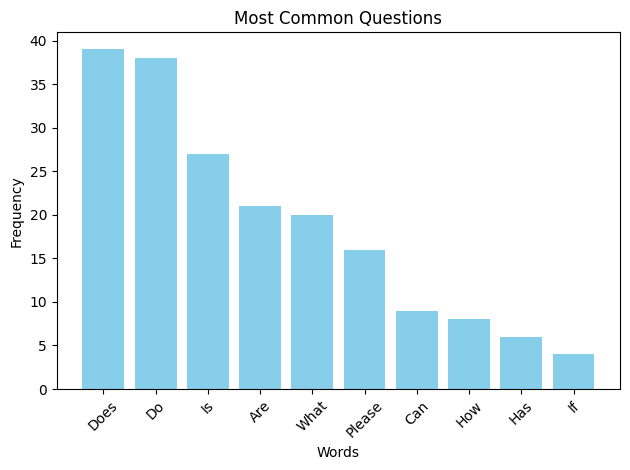

In [90]:
import matplotlib.pyplot as plt


top_words=[word for word,count in start_word_counts.most_common(10)]
top_counts = [count for word, count in start_word_counts.most_common(10)]

plt.bar(top_words, top_counts, color='skyblue')

# Add title and labels
plt.title('Most Common Questions')
plt.xlabel('Words')
plt.ylabel('Frequency')


plt.xticks(rotation=45)

# Display the chart
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [83]:
print("\n=== Common Keywords or Phrases ===")
all_words = " ".join(df["cleaned_questions"]).split()
keywword_counts = Counter(all_words)
print("\nMost common keywords:")
for word, count in keywword_counts.most_common(10):  # Top 10 keywords
    print(f"- '{word}' appears {count} times")


=== Common Keywords or Phrases ===

Most common keywords:
- 'data' appears 49 times
- 'client' appears 35 times
- 'please' appears 30 times
- 'security' appears 27 times
- 'provide' appears 26 times
- 'access' appears 25 times
- 'information' appears 24 times
- 'organization' appears 21 times
- 'application' appears 17 times
- 'system' appears 17 times


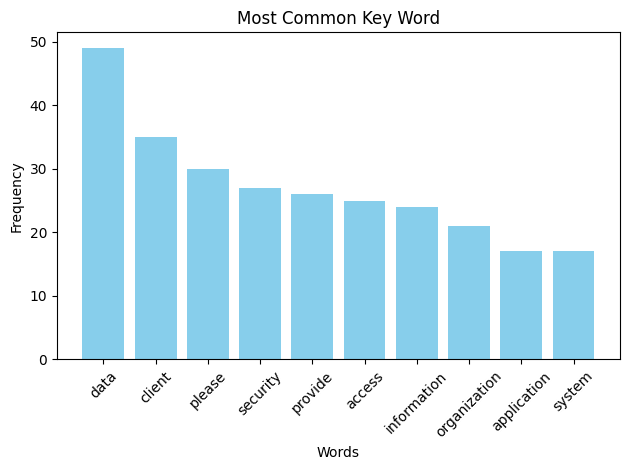

In [98]:
import matplotlib.pyplot as plt


top_keywords=[word for word,count in keywword_counts.most_common(10)]
top_counts = [count for word, count in keywword_counts.most_common(10)]

plt.bar(top_keywords, top_counts, color='skyblue')

# Add title and labels
plt.title('Most Common Key Word')
plt.xlabel('Words')
plt.ylabel('Frequency')


plt.xticks(rotation=45)

# Display the chart
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [1]:
import numpy as np
# Identify common keywords using TF-IDF
vectorizer = TfidfVectorizer(stop_words="english", max_features=10) #Sets up the TF-IDF vectorizer to use only the top 20 most frequent words as features.
tfidf_matrix = vectorizer.fit_transform(df["cleaned_questions"])
keywords = vectorizer.get_feature_names_out() # It returns an array of feature names.
print(keywords)

tfidf_scores = np.mean(tfidf_matrix.toarray(), axis=0)

keyword_score_pairs = list(zip(keywords, tfidf_scores))

keyword_score_pairs.sort(key=lambda x: x[1], reverse=True)

sorted_keywords, sorted_scores = zip(*keyword_score_pairs)

# Print the keywords and their TF-IDF scores
print("Keywords and their TF-IDF scores:")
for word, score in keyword_score_pairs:
    print(f"- '{word}': {score:.4f}")



plt.figure(figsize=(10, 6))

plt.bar(sorted_keywords, sorted_scores, color='skyblue')


plt.title('Keywords and Their TF-IDF Scores')
plt.xlabel('Keywords')
plt.ylabel('TF-IDF Score')


plt.xticks(rotation=45, ha='right')

# Display the chart
plt.tight_layout()
plt.show()

NameError: name 'TfidfVectorizer' is not defined